## HEADER

## TODO
- Double gameweeks and blank gameweeks wont work plainly on FBRef-data

# Fantasy premier league data adventures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from PremierLeague import FBREF
from ast import literal_eval

In [2]:
pd.set_option('display.max_rows', 30)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Getting data

In [3]:
fbref = FBREF()

In [4]:
pl_table = fbref.get_league_table()

In [5]:
#pl_table['Last 5']=pl_table['Last 5'].astype('|S').str.decode("utf-8")
pl_table

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Form
Rk,,,,,,,,,,,,,,,,
1,Arsenal,15,13,1,1,36,12,24,40,2.67,28.2,12.9,15.3,1.02,D W W W W,12
2,Newcastle Utd,16,9,6,1,32,11,21,33,2.06,26.2,14.9,11.3,0.71,W W W W W,15
3,Man City,14,10,2,2,40,14,26,32,2.29,27.6,11.2,16.4,1.17,L W W W L,3
4,Tottenham,16,9,3,4,33,23,10,30,1.88,25.2,18.5,6.7,0.42,L W L W D,0
5,Manchester Utd,14,8,2,4,20,20,0,26,1.86,18.8,17.3,1.5,0.11,W D W L W,6
6,Liverpool,15,7,4,4,31,18,13,25,1.67,26.9,20.9,6.0,0.40,L L W W W,3
7,Brighton,15,7,3,5,26,20,6,24,1.60,22.1,17.8,4.3,0.29,L W W L W,3
8,Fulham,16,6,4,6,27,26,1,22,1.38,22.2,27.7,-5.5,-0.34,W D L L W,0
9,Chelsea,14,6,3,5,17,17,0,21,1.50,15.4,19.3,-3.9,-0.28,D D L L L,-9


In [6]:
pl_table.sort_values('Form', ascending=False)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Form
Rk,,,,,,,,,,,,,,,,
2,Newcastle Utd,16,9,6,1,32,11,21,33,2.06,26.2,14.9,11.3,0.71,W W W W W,15
1,Arsenal,15,13,1,1,36,12,24,40,2.67,28.2,12.9,15.3,1.02,D W W W W,12
5,Manchester Utd,14,8,2,4,20,20,0,26,1.86,18.8,17.3,1.5,0.11,W D W L W,6
3,Man City,14,10,2,2,40,14,26,32,2.29,27.6,11.2,16.4,1.17,L W W W L,3
6,Liverpool,15,7,4,4,31,18,13,25,1.67,26.9,20.9,6.0,0.40,L L W W W,3
7,Brighton,15,7,3,5,26,20,6,24,1.60,22.1,17.8,4.3,0.29,L W W L W,3
19,Nott'ham Forest,15,3,4,8,11,30,-19,13,0.87,15.3,24.1,-8.8,-0.59,D W L D W,3
12,Aston Villa,16,5,3,8,17,25,-8,18,1.13,19.1,22.0,-2.8,-0.18,W L W W L,3
13,Leicester,16,5,2,9,25,28,-3,17,1.06,18.1,24.1,-6.0,-0.37,W L W W L,3


In [8]:
LEAGUE_ID = 1342688
url = f"https://fantasy.premierleague.com/api/bootstrap-static/"
res = requests.get(url)
#print(json.dumps(res.json(), indent=4))


In [9]:
data = res.json()

In [10]:
elements_df = pd.DataFrame(data['elements'])
elements_types_df = pd.DataFrame(data['element_types'])
teams_df = pd.DataFrame(data['teams'])

In [12]:
df = elements_df[['id', 'web_name','team','element_type','selected_by_percent','now_cost','minutes','value_season','total_points', 'form','goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded',
       'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank', 'threat_rank_type',
       'ict_index_rank', 'ict_index_rank_type',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'direct_freekicks_order',
       'direct_freekicks_text', 'penalties_order', 'penalties_text',
       'expected_goals_per_90', 'saves_per_90', 'expected_assists_per_90',
       'expected_goal_involvements_per_90', 'expected_goals_conceded_per_90',
       'goals_conceded_per_90', 'now_cost_rank', 'now_cost_rank_type',
       'form_rank', 'form_rank_type', 'points_per_game_rank',
       'points_per_game_rank_type', 'selected_rank', 'selected_rank_type',
       'starts_per_90', 'clean_sheets_per_90']]

In [13]:
%%capture
df['position'] = df.element_type.map(elements_types_df.set_index('id').singular_name)
df['team'] = df.team.map(teams_df.set_index('id').name)
df['value'] = df.value_season.astype(float)
df['form'] = df.form.astype(float)
df.drop(['value_season', 'element_type'], axis=1, inplace=True)
df['form_per_cost'] = df.form / df.now_cost
#df['']

df = df.loc[df.value > 0]

# Teams

In [14]:
team_pivot = df.pivot_table(index=['team','position'],values=['value','form','form_per_cost'],aggfunc=np.mean).reset_index()
team_pivot = team_pivot[['team', 'position', 'value', 'form', 'form_per_cost']]
team_pivot.loc[team_pivot.position == 'Goalkeeper',:].sort_values(['value', 'form'],ascending=False).head(10)
team_pivot.loc[team_pivot.position == 'Defender',:].sort_values(['value', 'form'],ascending=False).head(10)
team_pivot.loc[team_pivot.position == 'Midfielder',:].sort_values(['value', 'form'],ascending=False).head(10)
team_pivot.loc[team_pivot.position == 'Forward',:].sort_values(['value', 'form'],ascending=False).head(10)

,team,position,value,form,form_per_cost
42,Leicester,Goalkeeper,14.6,11.0,0.268293
62,Nott'm Forest,Goalkeeper,14.3,6.0,0.127660
14,Brentford,Goalkeeper,13.3,3.0,0.065217
58,Newcastle,Goalkeeper,13.2,5.0,0.094340
78,Wolves,Goalkeeper,12.2,1.0,0.020000
2,Arsenal,Goalkeeper,11.8,6.0,0.122449
46,Liverpool,Goalkeeper,11.8,3.0,0.054545
26,Crystal Palace,Goalkeeper,10.7,2.0,0.044444
50,Man City,Goalkeeper,10.6,2.0,0.037037
18,Brighton,Goalkeeper,10.4,1.0,0.021739


,team,position,value,form,form_per_cost
0,Arsenal,Defender,7.437500,3.375000,0.067923
40,Leicester,Defender,6.657143,3.571429,0.080949
56,Newcastle,Defender,6.060000,2.700000,0.055150
68,Spurs,Defender,5.580000,1.100000,0.022526
20,Chelsea,Defender,5.050000,0.875000,0.017277
52,Man Utd,Defender,4.850000,1.000000,0.022530
24,Crystal Palace,Defender,4.742857,0.714286,0.015945
48,Man City,Defender,4.688889,0.888889,0.016586
16,Brighton,Defender,4.671429,0.714286,0.015968
76,Wolves,Defender,4.487500,0.625000,0.013807


,team,position,value,form,form_per_cost
59,Newcastle,Midfielder,6.850000,2.600000,0.050013
19,Brighton,Midfielder,6.490000,1.600000,0.029310
39,Leeds,Midfielder,6.022222,3.111111,0.057697
3,Arsenal,Midfielder,5.491667,3.000000,0.048910
7,Aston Villa,Midfielder,5.333333,1.777778,0.035455
51,Man City,Midfielder,5.255556,1.888889,0.024045
43,Leicester,Midfielder,5.200000,2.700000,0.047351
15,Brentford,Midfielder,4.900000,1.100000,0.023184
27,Crystal Palace,Midfielder,4.780000,1.000000,0.019691
35,Fulham,Midfielder,4.730769,1.538462,0.029631


,team,position,value,form,form_per_cost
9,Bournemouth,Forward,8.800000,5.500000,0.098659
49,Man City,Forward,7.700000,1.000000,0.012432
13,Brentford,Forward,6.633333,4.666667,0.064306
69,Spurs,Forward,5.650000,6.500000,0.059319
65,Southampton,Forward,5.366667,3.000000,0.047727
1,Arsenal,Forward,5.200000,1.000000,0.012500
25,Crystal Palace,Forward,5.050000,1.000000,0.019049
5,Aston Villa,Forward,4.966667,4.666667,0.073593
45,Liverpool,Forward,4.766667,6.333333,0.072840
41,Leicester,Forward,4.733333,2.000000,0.032903


# Value

In [15]:
df.sort_values('value', ascending=False).head(10)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
478,357,Trippier,Newcastle,64.9,59,1324,96,7.0,1,4,...,12,5,1,2,1,1.01964,0.61178,Defender,16.3,0.118644
490,369,Almirón,Newcastle,35.5,58,1255,93,6.0,8,2,...,15,7,3,7,3,1.07570,0.57371,Midfielder,16.0,0.103448
312,254,Ward,Leicester,28.6,41,1350,60,11.0,0,0,...,1,62,10,10,1,1.00000,0.40000,Goalkeeper,14.6,0.268293
523,398,Henderson,Nott'm Forest,12.5,47,1350,67,6.0,0,0,...,4,41,5,32,6,1.00000,0.26667,Goalkeeper,14.3,0.127660
23,26,Saliba,Arsenal,35.2,53,1245,74,6.0,2,1,...,20,18,2,8,3,1.01205,0.50602,Defender,14.0,0.113208
8,10,White,Arsenal,10.7,47,1150,66,8.0,0,2,...,4,31,7,39,12,1.09565,0.62609,Defender,14.0,0.170213
316,258,Castagne,Leicester,9.9,47,1191,65,6.0,1,2,...,19,37,9,40,13,0.98237,0.52897,Defender,13.8,0.127660
14,16,Gabriel,Arsenal,13.7,52,1260,72,5.0,2,0,...,24,21,4,28,8,1.00000,0.50000,Defender,13.8,0.096154
487,366,Schär,Newcastle,11.6,49,1244,67,7.0,1,0,...,10,30,6,35,11,1.01286,0.57878,Defender,13.7,0.142857
293,346,Andreas,Fulham,23.6,46,1240,61,2.0,2,5,...,45,55,26,13,6,1.08871,0.21774,Midfielder,13.3,0.043478


In [16]:
pivot=df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,9.224000
3,Midfielder,4.760952
0,Defender,4.759763
1,Forward,4.231579


In [17]:
fwd_df = df.loc[df.position == 'Forward']
mid_df = df.loc[df.position == 'Midfielder']
def_df = df.loc[df.position == 'Defender']
goal_df = df.loc[df.position == 'Goalkeeper']

<AxesSubplot: >

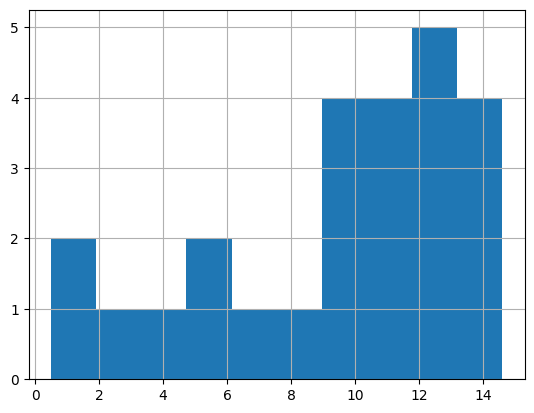

In [18]:
goal_df.value.hist()

In [19]:
goal_df.sort_values('value',ascending=False).head(10)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
312,254,Ward,Leicester,28.6,41,1350,60,11.0,0,0,...,1,62,10,10,1,1.00000,0.40000,Goalkeeper,14.6,0.268293
523,398,Henderson,Nott'm Forest,12.5,47,1350,67,6.0,0,0,...,4,41,5,32,6,1.00000,0.26667,Goalkeeper,14.3,0.127660
97,81,Raya,Brentford,7.5,46,1350,61,3.0,0,0,...,9,54,6,50,9,1.00000,0.26667,Goalkeeper,13.3,0.065217
497,376,Pope,Newcastle,21.6,53,1350,70,5.0,0,0,...,7,32,3,16,2,1.00000,0.46667,Goalkeeper,13.2,0.094340
637,478,Sá,Wolves,5.8,50,1350,61,1.0,0,0,...,19,58,8,62,12,1.00000,0.26667,Goalkeeper,12.2,0.020000
239,182,Pickford,Everton,6.0,45,1260,55,2.0,0,1,...,12,69,11,60,11,1.00000,0.21429,Goalkeeper,12.2,0.044444
607,455,Fabianski,West Ham,1.3,50,1243,59,9.0,0,0,...,2,70,12,157,26,1.08608,0.21722,Goalkeeper,11.8,0.180000
378,281,Alisson,Liverpool,16.0,55,1260,65,3.0,0,1,...,10,38,4,24,3,1.00000,0.28571,Goalkeeper,11.8,0.054545
13,15,Ramsdale,Arsenal,11.2,49,1260,58,6.0,0,0,...,5,57,7,37,7,1.00000,0.50000,Goalkeeper,11.8,0.122449
197,152,Guaita,Crystal Palace,3.3,45,1260,48,2.0,0,0,...,11,99,17,89,17,1.00000,0.21429,Goalkeeper,10.7,0.044444


<AxesSubplot: >

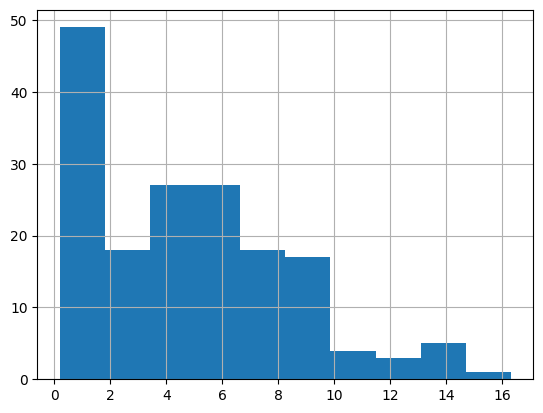

In [20]:
def_df.value.hist()

In [21]:
def_df.sort_values('value',ascending=False).head(10)
def_df.loc[def_df.minutes > 1000,:].sort_values('value',ascending=True).head(10)


,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
478,357,Trippier,Newcastle,64.9,59,1324,96,7.0,1,4,...,12,5,1,2,1,1.01964,0.61178,Defender,16.3,0.118644
8,10,White,Arsenal,10.7,47,1150,66,8.0,0,2,...,4,31,7,39,12,1.09565,0.62609,Defender,14.0,0.170213
23,26,Saliba,Arsenal,35.2,53,1245,74,6.0,2,1,...,20,18,2,8,3,1.01205,0.50602,Defender,14.0,0.113208
316,258,Castagne,Leicester,9.9,47,1191,65,6.0,1,2,...,19,37,9,40,13,0.98237,0.52897,Defender,13.8,0.127660
14,16,Gabriel,Arsenal,13.7,52,1260,72,5.0,2,0,...,24,21,4,28,8,1.00000,0.50000,Defender,13.8,0.096154
487,366,Schär,Newcastle,11.6,49,1244,67,7.0,1,0,...,10,30,6,35,11,1.01286,0.57878,Defender,13.7,0.142857
498,377,Botman,Newcastle,3.0,44,1057,55,7.0,0,1,...,7,49,10,92,31,1.02176,0.51088,Defender,12.5,0.159091
120,526,Mee,Brentford,5.2,46,1208,57,5.0,2,1,...,22,53,12,64,24,1.04305,0.29801,Defender,12.4,0.108696
479,358,Burn,Newcastle,1.9,45,1224,54,6.0,0,0,...,17,86,19,126,46,1.02941,0.51471,Defender,12.0,0.133333
257,475,Coady,Everton,6.6,50,1250,53,1.0,1,1,...,77,75,16,55,19,1.00800,0.28800,Defender,10.6,0.020000


,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
45,43,Cash,Aston Villa,3.8,46,1029,18,1.0,0,0,...,72,337,123,80,27,1.04956,0.08746,Defender,3.9,0.021739
346,230,Koch,Leeds,0.2,45,1215,21,0.0,0,0,...,201,324,116,370,137,1.03704,0.14815,Defender,4.7,0.000000
359,244,Kristensen,Leeds,0.4,48,1048,25,3.0,0,1,...,25,256,96,278,96,1.03053,0.17176,Defender,5.2,0.062500
562,420,Salisu,Southampton,0.2,44,1260,23,0.0,0,1,...,190,314,112,350,128,1.00000,0.07143,Defender,5.2,0.000000
510,385,McKenna,Nott'm Forest,0.1,44,1260,24,0.0,0,0,...,182,306,108,423,156,1.00000,0.21429,Defender,5.5,0.000000
78,71,Mepham,Bournemouth,0.1,44,1251,24,0.0,0,0,...,187,307,109,407,152,1.00719,0.21583,Defender,5.5,0.000000
288,217,Robinson,Fulham,0.1,44,1108,25,1.0,0,0,...,57,277,103,388,143,1.05596,0.24368,Defender,5.7,0.022727
653,516,Collins,Wolves,0.7,44,1022,29,1.0,0,0,...,62,208,74,226,85,1.05675,0.26419,Defender,6.6,0.022727
212,167,Guéhi,Crystal Palace,2.8,44,1260,29,1.0,0,0,...,58,252,93,97,34,1.00000,0.21429,Defender,6.6,0.022727
201,156,Ward,Crystal Palace,0.4,45,1020,30,0.0,0,0,...,192,194,67,280,97,0.97059,0.26471,Defender,6.7,0.000000


<AxesSubplot: >

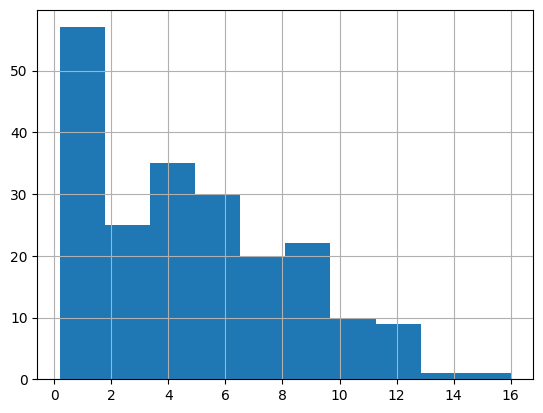

In [22]:
mid_df.value.hist()

In [23]:
mid_df.sort_values('value', ascending=False).head(10)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
490,369,Almirón,Newcastle,35.5,58,1255,93,6.0,8,2,...,15,7,3,7,3,1.07570,0.57371,Midfielder,16.0,0.103448
293,346,Andreas,Fulham,23.6,46,1240,61,2.0,2,5,...,45,55,26,13,6,1.08871,0.21774,Midfielder,13.3,0.043478
87,535,Tavernier,Bournemouth,0.9,49,1283,61,14.0,2,4,...,2,56,27,182,58,1.05222,0.28059,Midfielder,12.4,0.285714
132,104,Groß,Brighton,13.5,56,1192,69,1.0,5,2,...,127,25,12,29,12,1.05705,0.30201,Midfielder,12.3,0.017857
1,3,Xhaka,Arsenal,3.7,51,1166,62,1.0,3,3,...,115,42,20,83,28,1.08062,0.46312,Midfielder,12.2,0.019608
341,225,Rodrigo,Leeds,7.9,63,886,77,13.0,9,1,...,5,9,4,45,15,1.21896,0.20316,Midfielder,12.2,0.206349
5,7,Ødegaard,Arsenal,14.3,64,1076,77,16.0,6,2,...,1,10,5,25,11,1.08736,0.50186,Midfielder,12.0,0.250000
141,116,Mac Allister,Brighton,3.6,54,1256,62,9.0,5,0,...,8,43,21,84,29,1.00318,0.28662,Midfielder,11.5,0.166667
494,373,Willock,Newcastle,0.6,49,1113,56,11.0,2,2,...,6,81,40,235,75,1.05121,0.48518,Midfielder,11.4,0.224490
17,19,Martinelli,Arsenal,48.4,68,1183,77,6.0,5,4,...,17,15,9,5,1,1.06509,0.53254,Midfielder,11.3,0.088235


<AxesSubplot: >

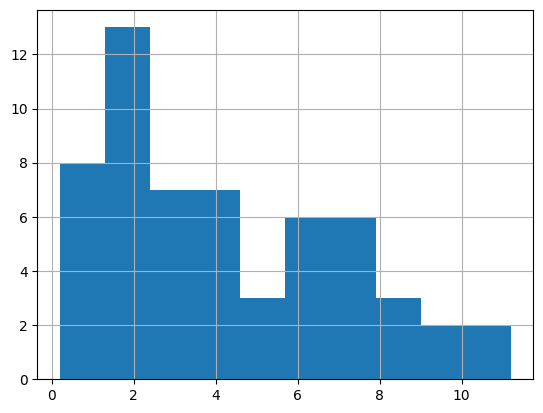

In [24]:
fwd_df.value.hist()

In [25]:
fwd_df.sort_values('value', ascending=False).head(10)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
96,80,Toney,Brentford,19.0,74,1260,83,13.0,10,2,...,2,11,4,19,4,1.00000,0.28571,Forward,11.2,0.175676
423,318,Haaland,Man City,82.8,122,1036,123,1.0,18,3,...,37,2,1,1,1,1.04247,0.43436,Forward,10.1,0.008197
73,66,Solanke,Bournemouth,7.1,58,1075,57,5.0,3,5,...,10,44,9,53,10,1.00465,0.33488,Forward,9.8,0.086207
281,210,Mitrović,Fulham,18.9,68,1019,61,0.0,9,0,...,69,22,6,21,5,1.05986,0.26497,Forward,9.0,0.000000
576,427,Kane,Spurs,27.4,116,1336,102,11.0,12,3,...,4,4,2,12,3,1.01048,0.33683,Forward,8.8,0.094828
25,28,Jesus,Arsenal,53.9,80,1220,69,2.0,5,6,...,16,28,8,3,2,1.03279,0.51639,Forward,8.6,0.025000
376,279,Firmino,Liverpool,7.8,81,928,69,6.0,7,3,...,7,19,5,48,9,1.06681,0.29095,Forward,8.5,0.074074
553,411,Adams,Southampton,1.0,64,1064,50,8.0,4,1,...,5,91,13,171,28,1.01504,0.08459,Forward,7.8,0.125000
69,62,Moore,Bournemouth,1.4,54,745,42,6.0,4,0,...,6,157,18,155,24,0.96644,0.36242,Forward,7.8,0.111111
111,95,Mbeumo,Brentford,1.8,58,1119,45,1.0,3,1,...,30,141,17,128,19,1.20643,0.32172,Forward,7.8,0.017241


# Form

In [26]:
df.sort_values('form', ascending=False).head(30)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
5,7,Ødegaard,Arsenal,14.3,64,1076,77,16.0,6,2,...,1,10,5,25,11,1.08736,0.50186,Midfielder,12.0,0.250000
589,440,Bentancur,Spurs,0.5,54,1183,59,14.0,4,2,...,3,51,25,244,79,0.98901,0.30431,Midfielder,10.9,0.259259
87,535,Tavernier,Bournemouth,0.9,49,1283,61,14.0,2,4,...,2,56,27,182,58,1.05222,0.28059,Midfielder,12.4,0.285714
393,297,Darwin,Liverpool,12.2,90,601,44,13.0,5,2,...,3,46,10,34,6,1.04825,0.14975,Forward,4.9,0.144444
96,80,Toney,Brentford,19.0,74,1260,83,13.0,10,2,...,2,11,4,19,4,1.00000,0.28571,Forward,11.2,0.175676
32,30,Ings,Aston Villa,1.5,66,719,46,13.0,5,0,...,1,111,14,142,23,1.00139,0.25035,Forward,7.0,0.196970
460,519,Eriksen,Man Utd,2.9,63,1043,50,13.0,1,4,...,4,77,36,95,35,1.03547,0.34516,Midfielder,7.9,0.206349
341,225,Rodrigo,Leeds,7.9,63,886,77,13.0,9,1,...,5,9,4,45,15,1.21896,0.20316,Midfielder,12.2,0.206349
576,427,Kane,Spurs,27.4,116,1336,102,11.0,12,3,...,4,4,2,12,3,1.01048,0.33683,Forward,8.8,0.094828
526,493,Gibbs-White,Nott'm Forest,0.4,55,1215,55,11.0,2,3,...,7,83,41,276,97,1.03704,0.29630,Midfielder,10.0,0.200000


In [27]:
df.sort_values('form_per_cost', ascending=False).head(30)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
87,535,Tavernier,Bournemouth,0.9,49,1283,61,14.0,2,4,...,2,56,27,182,58,1.05222,0.28059,Midfielder,12.4,0.285714
312,254,Ward,Leicester,28.6,41,1350,60,11.0,0,0,...,1,62,10,10,1,1.00000,0.40000,Goalkeeper,14.6,0.268293
589,440,Bentancur,Spurs,0.5,54,1183,59,14.0,4,2,...,3,51,25,244,79,0.98901,0.30431,Midfielder,10.9,0.259259
5,7,Ødegaard,Arsenal,14.3,64,1076,77,16.0,6,2,...,1,10,5,25,11,1.08736,0.50186,Midfielder,12.0,0.250000
494,373,Willock,Newcastle,0.6,49,1113,56,11.0,2,2,...,6,81,40,235,75,1.05121,0.48518,Midfielder,11.4,0.224490
341,225,Rodrigo,Leeds,7.9,63,886,77,13.0,9,1,...,5,9,4,45,15,1.21896,0.20316,Midfielder,12.2,0.206349
460,519,Eriksen,Man Utd,2.9,63,1043,50,13.0,1,4,...,4,77,36,95,35,1.03547,0.34516,Midfielder,7.9,0.206349
526,493,Gibbs-White,Nott'm Forest,0.4,55,1215,55,11.0,2,3,...,7,83,41,276,97,1.03704,0.29630,Midfielder,10.0,0.200000
32,30,Ings,Aston Villa,1.5,66,719,46,13.0,5,0,...,1,111,14,142,23,1.00139,0.25035,Forward,7.0,0.196970
525,474,Boly,Nott'm Forest,0.2,42,153,8,8.0,0,0,...,2,63,13,355,129,1.17647,0.58824,Defender,1.9,0.190476


In [28]:
pivot=df.pivot_table(index='position',values=['form', 'form_per_cost'],aggfunc=np.mean).reset_index()
pivot.sort_values('form',ascending=False)

,position,form,form_per_cost
2,Goalkeeper,3.000000,0.064235
1,Forward,2.087719,0.030993
3,Midfielder,1.857143,0.033851
0,Defender,1.402367,0.029972


In [29]:
pivot.sort_values('form_per_cost',ascending=False)

,position,form,form_per_cost
2,Goalkeeper,3.000000,0.064235
3,Midfielder,1.857143,0.033851
1,Forward,2.087719,0.030993
0,Defender,1.402367,0.029972


<AxesSubplot: >

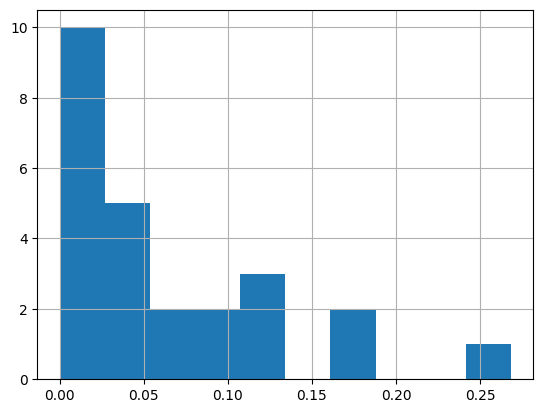

In [30]:
goal_df.form_per_cost.hist()

In [31]:
goal_df.sort_values('form_per_cost', ascending=False).head(10)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
312,254,Ward,Leicester,28.6,41,1350,60,11.0,0,0,...,1,62,10,10,1,1.00000,0.40000,Goalkeeper,14.6,0.268293
79,72,Travers,Bournemouth,0.4,43,675,19,8.0,0,0,...,3,206,23,259,38,0.93333,0.26667,Goalkeeper,4.4,0.186047
607,455,Fabianski,West Ham,1.3,50,1243,59,9.0,0,0,...,2,70,12,157,26,1.08608,0.21722,Goalkeeper,11.8,0.180000
523,398,Henderson,Nott'm Forest,12.5,47,1350,67,6.0,0,0,...,4,41,5,32,6,1.00000,0.26667,Goalkeeper,14.3,0.127660
13,15,Ramsdale,Arsenal,11.2,49,1260,58,6.0,0,0,...,5,57,7,37,7,1.00000,0.50000,Goalkeeper,11.8,0.122449
269,2,Leno,Fulham,1.7,45,1170,47,5.0,0,0,...,6,87,14,138,23,1.00000,0.15385,Goalkeeper,10.4,0.111111
497,376,Pope,Newcastle,21.6,53,1350,70,5.0,0,0,...,7,32,3,16,2,1.00000,0.46667,Goalkeeper,13.2,0.094340
437,327,De Gea,Man Utd,7.2,49,1260,50,4.0,0,0,...,8,88,15,52,10,1.00000,0.35714,Goalkeeper,10.2,0.081633
97,81,Raya,Brentford,7.5,46,1350,61,3.0,0,0,...,9,54,6,50,9,1.00000,0.26667,Goalkeeper,13.3,0.065217
378,281,Alisson,Liverpool,16.0,55,1260,65,3.0,0,1,...,10,38,4,24,3,1.00000,0.28571,Goalkeeper,11.8,0.054545


<AxesSubplot: >

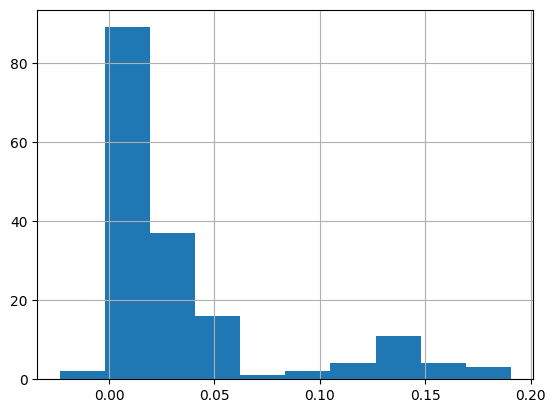

In [32]:
def_df.form_per_cost.hist()

In [33]:
def_df.sort_values('form_per_cost', ascending=False).head(15)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
525,474,Boly,Nott'm Forest,0.2,42,153,8,8.0,0,0,...,2,63,13,355,129,1.17647,0.58824,Defender,1.9,0.190476
64,57,Smith,Bournemouth,0.3,44,1305,38,8.0,0,1,...,3,193,66,319,113,1.03448,0.27586,Defender,8.6,0.181818
8,10,White,Arsenal,10.7,47,1150,66,8.0,0,2,...,4,31,7,39,12,1.09565,0.62609,Defender,14.0,0.170213
513,388,Worrall,Nott'm Forest,0.1,42,713,18,7.0,0,0,...,5,313,111,428,160,0.88359,0.25245,Defender,4.3,0.166667
315,257,Amartey,Leicester,0.8,43,913,41,7.0,0,0,...,6,98,24,198,71,0.98576,0.49288,Defender,9.5,0.162791
498,377,Botman,Newcastle,3.0,44,1057,55,7.0,0,1,...,7,49,10,92,31,1.02176,0.51088,Defender,12.5,0.159091
540,628,Aurier,Nott'm Forest,0.1,45,530,22,7.0,0,0,...,8,123,38,424,157,1.01887,0.50943,Defender,4.9,0.155556
581,432,Davies,Spurs,1.2,49,994,48,7.0,2,1,...,9,66,14,161,57,0.99598,0.36217,Defender,9.8,0.142857
328,270,Thomas,Leicester,0.1,42,272,6,6.0,0,0,...,13,323,115,425,158,0.99265,0.33088,Defender,1.4,0.142857
487,366,Schär,Newcastle,11.6,49,1244,67,7.0,1,0,...,10,30,6,35,11,1.01286,0.57878,Defender,13.7,0.142857


<AxesSubplot: >

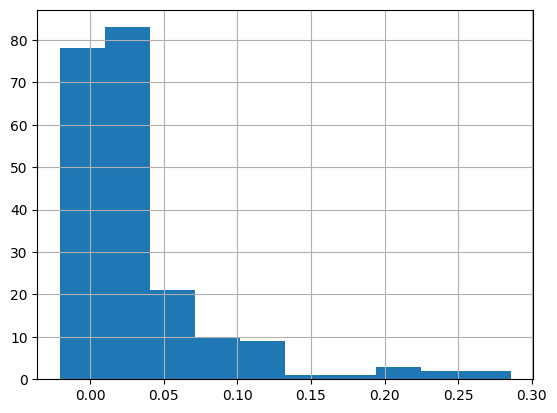

In [34]:
mid_df.form_per_cost.hist()

In [35]:
mid_df.sort_values('form_per_cost', ascending=False).head(15)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
87,535,Tavernier,Bournemouth,0.9,49,1283,61,14.0,2,4,...,2,56,27,182,58,1.05222,0.28059,Midfielder,12.4,0.285714
589,440,Bentancur,Spurs,0.5,54,1183,59,14.0,4,2,...,3,51,25,244,79,0.98901,0.30431,Midfielder,10.9,0.259259
5,7,Ødegaard,Arsenal,14.3,64,1076,77,16.0,6,2,...,1,10,5,25,11,1.08736,0.50186,Midfielder,12.0,0.250000
494,373,Willock,Newcastle,0.6,49,1113,56,11.0,2,2,...,6,81,40,235,75,1.05121,0.48518,Midfielder,11.4,0.224490
460,519,Eriksen,Man Utd,2.9,63,1043,50,13.0,1,4,...,4,77,36,95,35,1.03547,0.34516,Midfielder,7.9,0.206349
341,225,Rodrigo,Leeds,7.9,63,886,77,13.0,9,1,...,5,9,4,45,15,1.21896,0.20316,Midfielder,12.2,0.206349
526,493,Gibbs-White,Nott'm Forest,0.4,55,1215,55,11.0,2,3,...,7,83,41,276,97,1.03704,0.29630,Midfielder,10.0,0.200000
141,116,Mac Allister,Brighton,3.6,54,1256,62,9.0,5,0,...,8,43,21,84,29,1.00318,0.28662,Midfielder,11.5,0.166667
355,240,Summerville,Leeds,1.4,44,467,40,7.0,4,1,...,11,64,30,153,52,0.77088,0.00000,Midfielder,9.1,0.159091
48,46,Douglas Luiz,Aston Villa,0.4,48,926,37,6.0,1,2,...,12,188,78,279,98,0.97192,0.29158,Midfielder,7.7,0.125000


<AxesSubplot: >

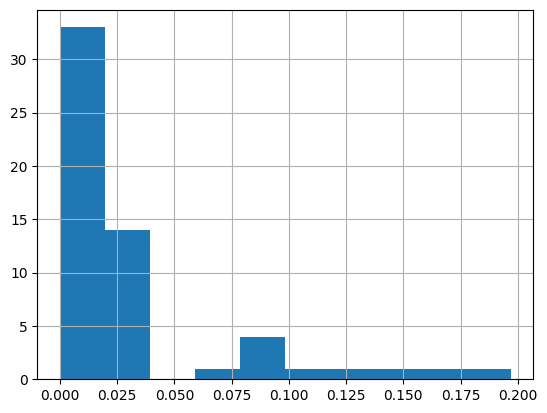

In [36]:
fwd_df.form_per_cost.hist()

In [37]:
fwd_df.sort_values('form_per_cost', ascending=False).head(15)

,id,web_name,team,selected_by_percent,now_cost,minutes,total_points,form,goals_scored,assists,...,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,position,value,form_per_cost
32,30,Ings,Aston Villa,1.5,66,719,46,13.0,5,0,...,1,111,14,142,23,1.00139,0.25035,Forward,7.0,0.196970
96,80,Toney,Brentford,19.0,74,1260,83,13.0,10,2,...,2,11,4,19,4,1.00000,0.28571,Forward,11.2,0.175676
393,297,Darwin,Liverpool,12.2,90,601,44,13.0,5,2,...,3,46,10,34,6,1.04825,0.14975,Forward,4.9,0.144444
553,411,Adams,Southampton,1.0,64,1064,50,8.0,4,1,...,5,91,13,171,28,1.01504,0.08459,Forward,7.8,0.125000
69,62,Moore,Bournemouth,1.4,54,745,42,6.0,4,0,...,6,157,18,155,24,0.96644,0.36242,Forward,7.8,0.111111
576,427,Kane,Spurs,27.4,116,1336,102,11.0,12,3,...,4,4,2,12,3,1.01048,0.33683,Forward,8.8,0.094828
519,394,Johnson,Nott'm Forest,0.8,56,1186,38,5.0,2,1,...,8,202,26,196,32,0.98651,0.22766,Forward,6.8,0.089286
329,271,Daka,Leicester,1.1,57,634,39,5.0,3,2,...,9,160,20,167,26,0.99369,0.70978,Forward,6.8,0.087719
73,66,Solanke,Bournemouth,7.1,58,1075,57,5.0,3,5,...,10,44,9,53,10,1.00465,0.33488,Forward,9.8,0.086207
376,279,Firmino,Liverpool,7.8,81,928,69,6.0,7,3,...,7,19,5,48,9,1.06681,0.29095,Forward,8.5,0.074074


In [38]:
team_pivot.team.value_counts()

Arsenal           4
Aston Villa       4
West Ham          4
Spurs             4
Southampton       4
Nott'm Forest     4
Newcastle         4
Man Utd           4
Man City          4
Liverpool         4
Leicester         4
Leeds             4
Fulham            4
Everton           4
Crystal Palace    4
Chelsea           4
Brighton          4
Brentford         4
Bournemouth       4
Wolves            4
Name: team, dtype: int64